## Assignment Part-I: Advanced_Regression

### Import the necessary libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Step 1: Reading and Understanding the Data

In [3]:
# Importing dataset to predict the House pice

Housing_Data = pd.read_csv('train.csv')
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
Housing_Data.shape

(1460, 81)

In [6]:
Housing_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

In [8]:
Housing_Data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

### Step 2: Cleaning Dataset

In [9]:
# Dropping duplicate values in dataset, if exist

Housing_Data.drop_duplicates()
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Removing identifier field
Housing_Data.drop(['Id'], axis=1, inplace=True)

In [11]:
# Check after removing the duplicates and identifier
Housing_Data.info()
Housing_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
#Categorical columns
Housing_Data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Numeric columns
Housing_Data.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
# check for null values in all categorical columns

Housing_Data.select_dtypes(include='object').isnull().sum()[Housing_Data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
# Check the highest Null value columns in percentage
null_Check= pd.DataFrame(round(Housing_Data.isnull().sum()/len(Housing_Data.index)*100,2).sort_values(ascending=False),columns=["Null_Percent"])
null_Check.head()

,Null_Percent
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [16]:
# Check features having null values in percentage
Features_with_Nullvalue = null_Check[null_Check["Null_Percent"] > 0]
Features_with_Nullvalue

,Null_Percent
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [17]:
# Check for null values in all categorical columns as per count
Housing_Data.select_dtypes(include='object').isnull().sum()[Housing_Data.select_dtypes(include='object').isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

**Certain columns have greater than 80% missing values so removing them**

    Alley ,  PoolQC, Miscfeature, Fence, FireplaceQu

In [18]:
Housing_Data.drop(['Alley','PoolQC','MiscFeature' , 'Fence','FireplaceQu'],axis=1,inplace = True) 

Housing_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = Housing_Data.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(Housing_Data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

Housing_Data.drop(columnsToBeRemoved, axis = 1, inplace = True)

Housing_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,61,0,0,0,0,0,2,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,0,0,0,5,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,42,0,0,0,0,0,9,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,35,272,0,0,0,0,2,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,84,0,0,0,0,0,12,2008,Normal,250000


In [20]:
Housing_Data.isnull().values.any()

True

In [21]:
#for the LotFrontage column and GarageYrBlt we will inpute the missing values with the median since the feature contains outliers
Housing_Data['LotFrontage'] = Housing_Data['LotFrontage'].fillna(Housing_Data['LotFrontage'].median())

Housing_Data['GarageYrBlt'] = Housing_Data['GarageYrBlt'].fillna(Housing_Data['GarageYrBlt'].median())

    
# for the rest of the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType'):
    
    Housing_Data[col] = Housing_Data[col].fillna(Housing_Data[col].mode()[0])

In [27]:
# Once again check for null values in all categorical columns
Housing_Data.select_dtypes(include='object').isnull().sum()[Housing_Data.select_dtypes(include='object').isnull().sum()>0]

BsmtQual        37
BsmtExposure    38
BsmtFinType1    37
GarageType      81
GarageFinish    81
dtype: int64

In [29]:
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'GarageType', 'BsmtFinType1','GarageFinish','BsmtQual'):
    
    Housing_Data[col] = Housing_Data[col].fillna(Housing_Data[col].mode()[0])

In [30]:
Housing_Data.isnull().values.any()

False

In [31]:
# check Null value
Housing_Data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal     

In [32]:
# check for null values in all numerical columns

Housing_Data.select_dtypes(exclude='object').isnull().sum()[Housing_Data.select_dtypes(exclude='object').isnull().sum()>0]

Series([], dtype: int64)

In [33]:
# check the null values in the numerical data

Housing_Data.select_dtypes(include=['int64','float']).isnull().sum()[Housing_Data.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

Series([], dtype: int64)

In [34]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

Housing_Data['LotFrontage'] = Housing_Data['LotFrontage'].replace(np.nan, Housing_Data['LotFrontage'].median())
Housing_Data['MasVnrArea'] = Housing_Data['MasVnrArea'].replace(np.nan, Housing_Data['MasVnrArea'].median())

In [35]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

Housing_Data['GarageYrBlt']=Housing_Data['GarageYrBlt'].fillna(0)
Housing_Data['GarageYrBlt'] = Housing_Data['GarageYrBlt'].astype(int)

In [36]:
# Verify the changes
Housing_Data.shape

(1460, 57)

In [37]:
# Removing columns where unique values are 1 as it illustrates that all values are same in column
print(Housing_Data['PoolArea'].value_counts())
print(Housing_Data['MiscVal'].value_counts())
print(Housing_Data['3SsnPorch'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [38]:
Housing_Data= Housing_Data.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [39]:
Housing_Data.shape

(1460, 54)

In [40]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
Housing_Data['IsRemodelled'] = Housing_Data.apply(checkForRemodel, axis=1)
Housing_Data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,0,0,2,2008,Normal,208500,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,0,0,5,2007,Normal,181500,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,0,0,9,2008,Normal,223500,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,272,0,2,2006,Abnorml,140000,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,0,0,12,2008,Normal,250000,0


In [41]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
Housing_Data['BuiltOrRemodelAge'] = Housing_Data.apply(getBuiltOrRemodelAge, axis=1)
Housing_Data.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,0,61,0,0,2,2008,Normal,208500,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,298,0,0,0,5,2007,Normal,181500,0,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,0,42,0,0,9,2008,Normal,223500,1,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,0,35,272,0,2,2006,Abnorml,140000,1,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,192,84,0,0,12,2008,Normal,250000,0,8


In [42]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
Housing_Data['OldOrNewGarage'] = Housing_Data['GarageYrBlt'].apply(getGarageConstructionPeriod)
Housing_Data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,61,0,0,2,2008,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,0,0,0,5,2007,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,42,0,0,9,2008,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,35,272,0,2,2006,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,84,0,0,12,2008,Normal,250000,0,8,1


In [43]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

Housing_Data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt', 'MoSold'], axis = 1, inplace = True)

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and above
Housing_Data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,3.000000,850.100000,335.000000,175.050000,180.150000,160.000000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,3.000000,1002.790000,505.460000,285.820000,261.050000,268.050000,442567.010000,1.000000,60.000000,1.000000


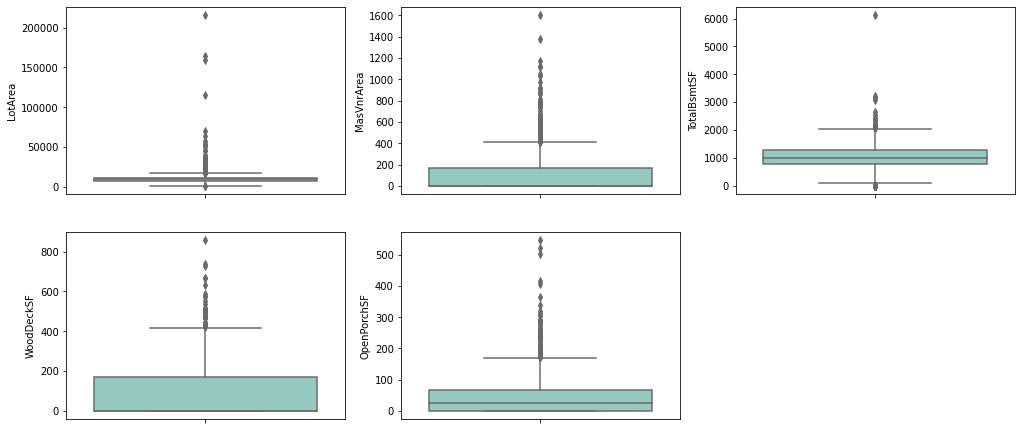

In [45]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = Housing_Data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = Housing_Data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = Housing_Data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = Housing_Data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = Housing_Data)
plt.show()

In [46]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = Housing_Data['LotArea'].quantile(0.98)
Housing_Data = Housing_Data[Housing_Data["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = Housing_Data['MasVnrArea'].quantile(0.98)
Housing_Data = Housing_Data[Housing_Data["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = Housing_Data['TotalBsmtSF'].quantile(0.99)
Housing_Data = Housing_Data[Housing_Data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = Housing_Data['WoodDeckSF'].quantile(0.99)
Housing_Data = Housing_Data[Housing_Data["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = Housing_Data['OpenPorchSF'].quantile(0.99)
Housing_Data = Housing_Data[Housing_Data["OpenPorchSF"] < nn_quartile_OpenPorchSF]

### Step 3: Visualizing the Data

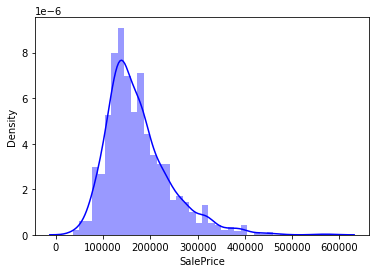

In [47]:
# Sale columns
plt.figure()
sns.distplot(Housing_Data['SalePrice'],color='b')
plt.show()

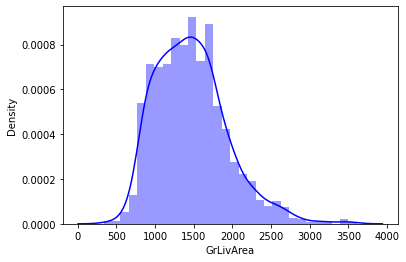

In [48]:
# Sale columns
plt.figure()
sns.distplot(Housing_Data['GrLivArea'],color='b')
plt.show()

<Figure size 1224x1440 with 0 Axes>

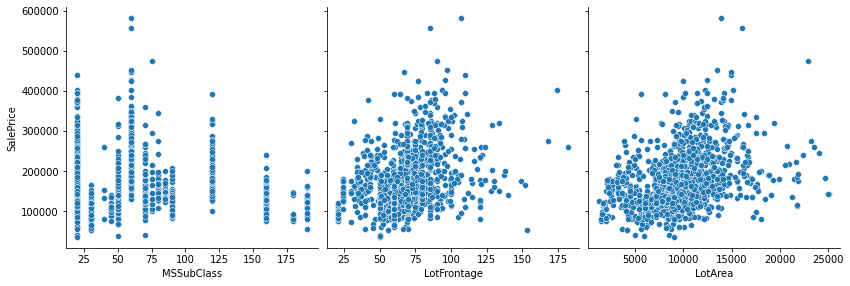

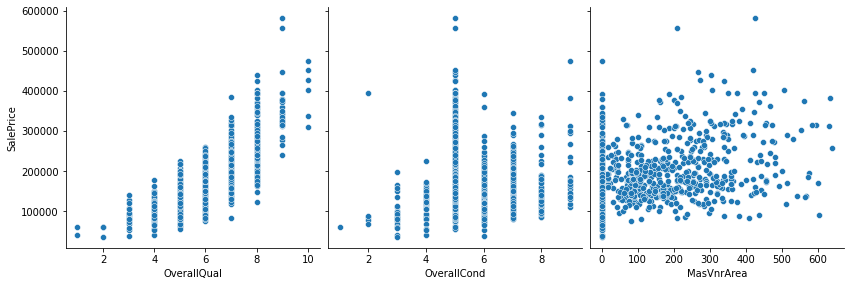

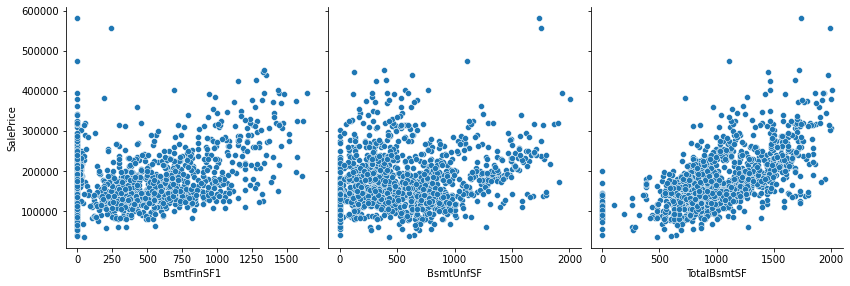

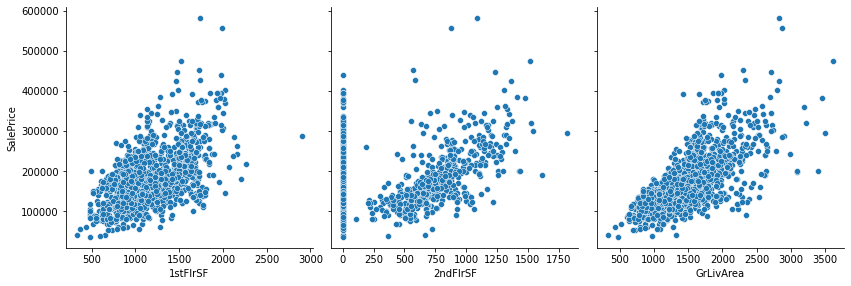

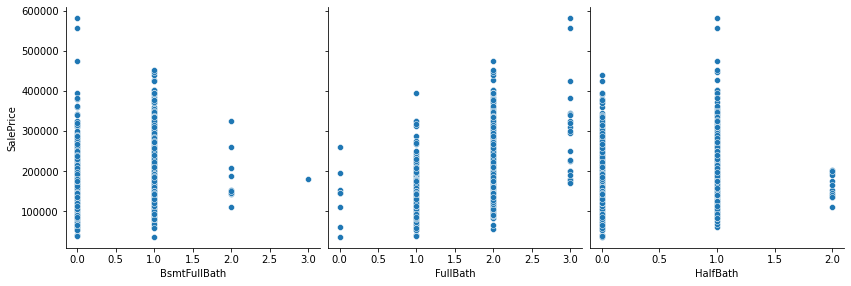

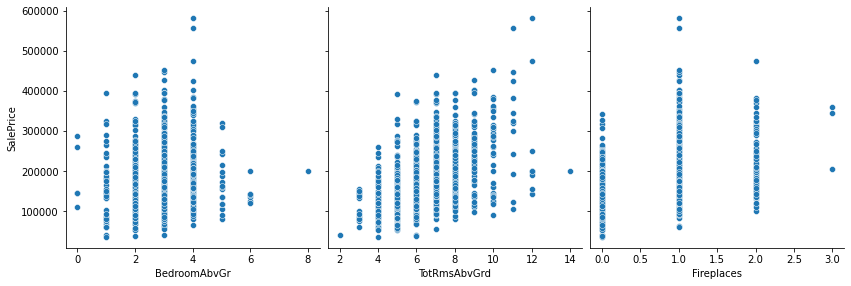

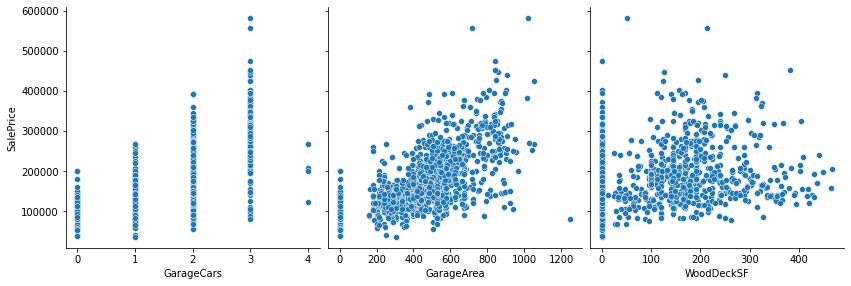

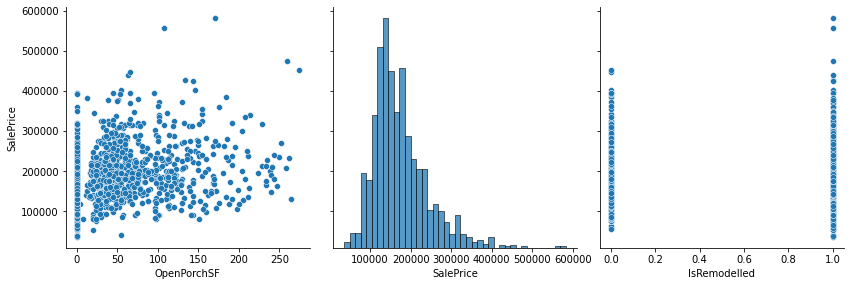

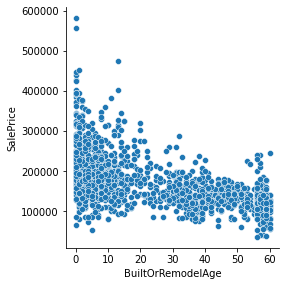

In [49]:
# Check the numerical values using pairplots

plt.figure(figsize=(17,20))
sns.pairplot(Housing_Data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(Housing_Data, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

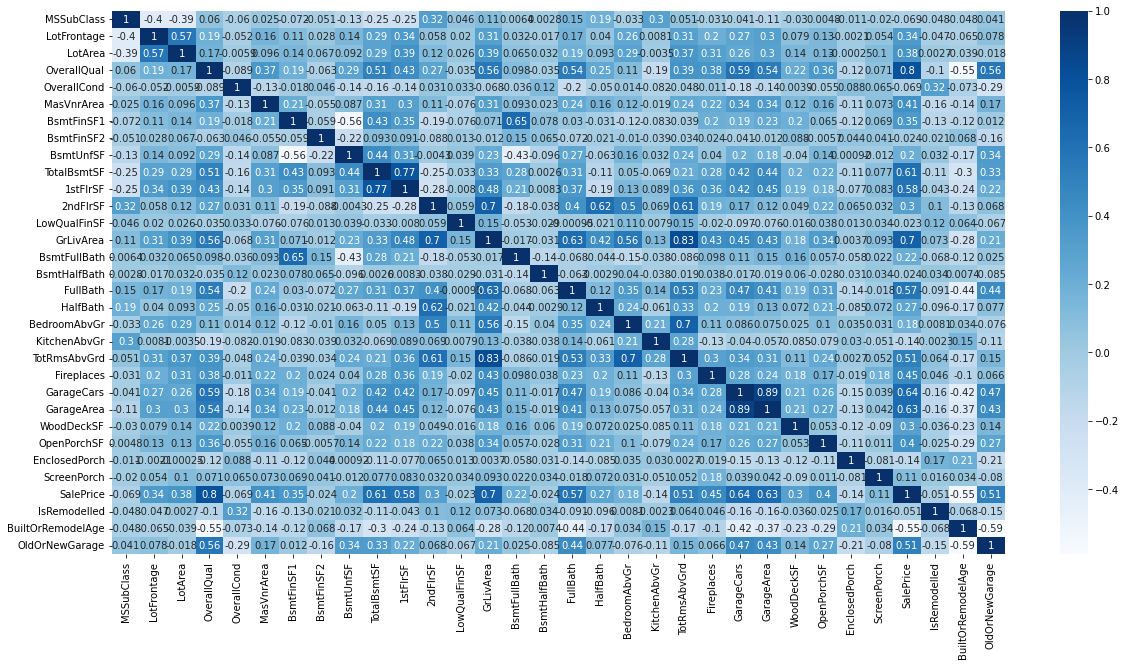

In [50]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(Housing_Data.corr(), annot = True, cmap="Blues")
plt.show()

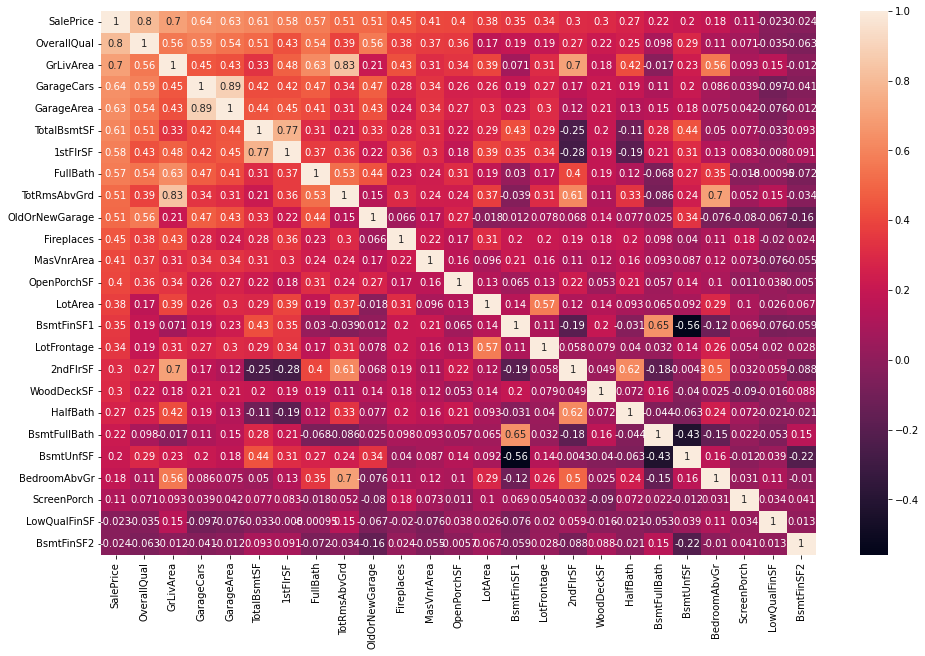

In [51]:
# sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = Housing_Data.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(Housing_Data[cols].corr(),annot=True)
plt.show()

Removing following columns which shows high correlation¶

OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF are highly correlated to Saleprice
- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

In [52]:
# Removing the highly correlated variables

Housing_Data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [53]:
Housing_Data.shape

(1358, 50)

### Step 4: Data Preparation¶

Converting categorical data into numercal data
Creating Dummies

In [54]:
# Mapping categorial data with numeric data
Housing_Data['d_LotShape'] = Housing_Data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
Housing_Data['d_ExterQual'] = Housing_Data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
Housing_Data['d_BsmtQual'] = Housing_Data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing_Data['d_BsmtExposure'] = Housing_Data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
Housing_Data['d_BsmtFinType1'] = Housing_Data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
Housing_Data['d_HeatingQC'] = Housing_Data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing_Data['d_KitchenQual'] = Housing_Data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
Housing_Data['d_GarageFinish'] = Housing_Data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
Housing_Data['d_BldgType'] = Housing_Data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
Housing_Data['d_HouseStyle'] = Housing_Data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
Housing_Data['d_LotConfig'] = Housing_Data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
Housing_Data['d_MasVnrType'] = Housing_Data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
Housing_Data['d_SaleCondition'] = Housing_Data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
Housing_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,1,6,5,4,2,1,4,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,4,5,5,3,2,1,1,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,2,6,5,4,2,1,4,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,1,5,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,3,6,5,4,2,1,4,2,1,1


In [55]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

Housing_Data = Housing_Data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'GarageFinish', 'BldgType', 'HouseStyle', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

Housing_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,6,5,4,2,1,4,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,4,5,5,3,2,1,1,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,2,6,5,4,2,1,4,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,1,5,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,3,6,5,4,2,1,4,2,1,1


## Dummy Variable

In [56]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(Housing_Data['MSZoning'], prefix='MSZoning', drop_first = True)
Housing_Data = pd.concat([Housing_Data, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(Housing_Data['Neighborhood'], prefix='Neighborhood', drop_first = True)
Housing_Data = pd.concat([Housing_Data, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(Housing_Data['RoofStyle'], prefix='RoofStyle', drop_first = True)
Housing_Data = pd.concat([Housing_Data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(Housing_Data['Exterior1st'], prefix='Exterior1st', drop_first = True)
Housing_Data = pd.concat([Housing_Data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(Housing_Data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
Housing_Data = pd.concat([Housing_Data, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(Housing_Data['Foundation'], prefix='Foundation', drop_first = True)
Housing_Data = pd.concat([Housing_Data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(Housing_Data['GarageType'], prefix='GarageType', drop_first = True)
Housing_Data = pd.concat([Housing_Data, d_GarageType], axis = 1)

Housing_Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,1,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,0


In [57]:
# drop the below columns as we now have new columns derived from these columns

Housing_Data = Housing_Data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

Housing_Data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,1,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,1,0,0,0,1,0,0,0,0


In [58]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 115 entries, MSSubClass to GarageType_Detchd
dtypes: float64(2), int64(41), uint8(72)
memory usage: 594.6 KB


### Step 5: Train Test Split

In [59]:
# Putting all feature variable to X

X = Housing_Data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,1,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,1,0,0,0,1,0,0,0,0


In [60]:
# Putting response variable to y

y = Housing_Data['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [61]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'],
      dtype='object', length=114)

In [62]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [63]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Step 5: Recursive feature elimination (RFE)¶
   

In [67]:
from sklearn.feature_selection import RFE
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, step=50)            
rfe = rfe.fit(X_train, y_train)

In [68]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,MasVnrArea,True,1
4,BsmtFinSF1,True,1
5,BsmtFinSF2,True,1
6,BsmtUnfSF,True,1
7,TotalBsmtSF,True,1
8,1stFlrSF,True,1
9,2ndFlrSF,True,1


In [69]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [70]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

In [72]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100,-15171.148948,-16038.733943,1
23,50,-15087.582656,-16042.105789,2
22,20,-15032.113267,-16080.376490,3
21,10.0,-15011.303747,-16127.385455,4
20,9.0,-15009.540348,-16133.493103,5
19,8.0,-15007.915886,-16139.665440,6
18,7.0,-15006.377304,-16145.915912,7
17,6.0,-15004.751495,-16152.332365,8
16,5.0,-15003.208406,-16158.957916,9
15,4.0,-15002.363568,-16166.151951,10


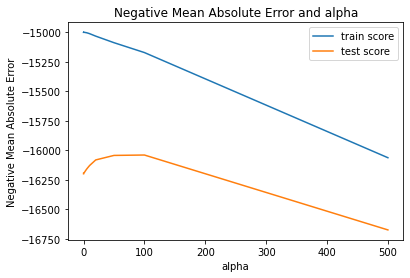

In [74]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [77]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=100)

In [78]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.87798279e+03,  1.14009073e+04,  5.60374071e+03,  3.46872124e+03,
        6.41333802e+03, -6.47952003e+02,  1.64136766e+02,  6.88860566e+03,
        4.83369281e+03,  9.88026775e+03,  1.77437938e+03,  1.26176645e+04,
        2.03350948e+03, -2.32920787e+03,  6.65395148e+03,  2.53926991e+03,
        2.27377341e+03,  3.17361390e+03,  4.89165454e+03,  5.63719113e+03,
        5.66243029e+03,  3.48616468e+03, -6.76712305e+03, -2.62510982e+03,
        6.68504789e+03,  2.40732223e+03,  7.69954428e+03,  4.26910752e+03,
       -2.04065760e+03,  4.57503645e+03, -2.35047413e+03, -1.24626320e+03,
       -2.02737555e+03, -2.52430065e+03, -2.67125146e+03,  7.35518687e+03,
       -2.47639241e+03, -2.79562719e+03,  4.11596777e+03,  1.36501239e+03,
        2.35955560e+03, -1.23761051e+01, -2.48620523e+03,  4.05228882e+03,
       -6.24507753e+03, -4.94579556e+03, -1.23761051e+01,  5.67682031e+03,
       -3.88635141e+03,  7.94719429e+03,  3.82788194e+03,  2.28579337e+03,
        4.70143392e+03,  

In [79]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

517763121.0880015

In [80]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,3877.9828
1,OverallQual,11400.9073
2,OverallCond,5603.7407
3,MasVnrArea,3468.7212
4,BsmtFinSF1,6413.3380
5,BsmtFinSF2,-647.9520
6,BsmtUnfSF,164.1368
7,TotalBsmtSF,6888.6057
8,1stFlrSF,4833.6928
9,2ndFlrSF,9880.2677


In [81]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 3877.9828,
 'OverallQual': 11400.9073,
 'OverallCond': 5603.7407,
 'MasVnrArea': 3468.7212,
 'BsmtFinSF1': 6413.338,
 'BsmtFinSF2': -647.952,
 'BsmtUnfSF': 164.1368,
 'TotalBsmtSF': 6888.6057,
 '1stFlrSF': 4833.6928,
 '2ndFlrSF': 9880.2677,
 'LowQualFinSF': 1774.3794,
 'GrLivArea': 12617.6645,
 'BsmtFullBath': 2033.5095,
 'BedroomAbvGr': -2329.2079,
 'GarageCars': 6653.9515,
 'WoodDeckSF': 2539.2699,
 'OpenPorchSF': 2273.7734,
 'ScreenPorch': 3173.6139,
 'd_ExterQual': 4891.6545,
 'd_BsmtQual': 5637.1911,
 'd_BsmtExposure': 5662.4303,
 'd_KitchenQual': 3486.1647,
 'd_BldgType': -6767.123,
 'd_HouseStyle': -2625.1098,
 'MSZoning_FV': 6685.0479,
 'MSZoning_RH': 2407.3222,
 'MSZoning_RL': 7699.5443,
 'MSZoning_RM': 4269.1075,
 'Neighborhood_CollgCr': -2040.6576,
 'Neighborhood_Crawfor': 4575.0365,
 'Neighborhood_Edwards': -2350.4741,
 'Neighborhood_Gilbert': -1246.2632,
 'Neighborhood_Mitchel': -2027.3755,
 'Neighborhood_NAmes': -2524.3007,
 'Neighborhood_NWAmes': -2671.2515,


In [84]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [85]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
9,GrLivArea,True,1,12617.6645
0,OverallQual,True,1,11400.9073
7,2ndFlrSF,True,1,9880.2677
26,Exterior2nd_VinylSd,True,1,7947.1943
16,MSZoning_RL,True,1,7699.5443
19,Neighborhood_NridgHt,True,1,7355.1869
5,TotalBsmtSF,True,1,6888.6057
15,MSZoning_FV,True,1,6685.0479
10,GarageCars,True,1,6653.9515
2,BsmtFinSF1,True,1,6413.3380


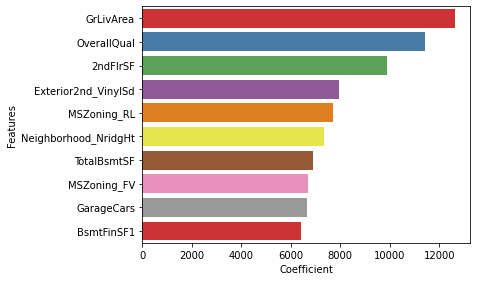

In [86]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

## Lasso

In [87]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.01,-14999.802509,-16214.271800,1
9,0.005,-14999.804010,-16214.332475,2
8,0.004,-14999.804310,-16214.344608,3
7,0.003,-14999.804610,-16214.356743,4
6,0.002,-14999.804910,-16214.368878,5
5,0.001,-14999.805210,-16214.381012,6
4,0.0005,-14999.805363,-16214.387092,7
3,0.0004,-14999.805394,-16214.388308,8
2,0.0003,-14999.805425,-16214.389525,9
1,0.0002,-14999.805455,-16214.390742,10


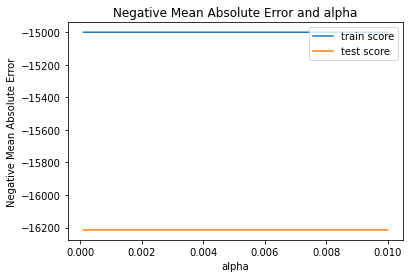

In [89]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [90]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.01)

In [91]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 3857.36453911, 11227.01565404,  5609.37418395,  3465.38801075,
       10600.72485487,   967.19634958,  4545.28681445,  3255.03297548,
       11493.35750817, 18690.88419769,  2906.7359058 ,  3416.10142422,
        2050.83895038, -2647.07283607,  6706.72370681,  2508.5168359 ,
        2147.15510268,  3168.4866955 ,  4636.89501831,  5517.0073569 ,
        5741.64303331,  3363.14032997, -6935.60808775, -2819.80034257,
        9019.59733305,  3588.68144891, 12071.27403343,  8188.06767025,
       -2078.88485985,  4599.66132582, -2482.0915627 , -1363.0905069 ,
       -2106.76524808, -2688.01757765, -2769.03286944,  7622.40437124,
       -2655.3953397 , -2894.69218762,  4276.22509453,  1368.67239232,
        2321.2385457 ,   216.18398667, -6186.29850252,  3820.26403714,
       -9940.03507665, -5555.90302138,  -275.8656367 ,  9287.25548635,
       -3732.77856859, 11589.54463722,  4393.52059887,  2562.10887265,
        5001.32724855,  2570.4655679 , -3959.03168678, -2324.10838678,
      

In [92]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

523970444.4282813

In [93]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,3857.3645
1,OverallQual,11227.0157
2,OverallCond,5609.3742
3,MasVnrArea,3465.3880
4,BsmtFinSF1,10600.7249
5,BsmtFinSF2,967.1963
6,BsmtUnfSF,4545.2868
7,TotalBsmtSF,3255.0330
8,1stFlrSF,11493.3575
9,2ndFlrSF,18690.8842


In [94]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 3857.3645391094733,
 'OverallQual': 11227.015654035276,
 'OverallCond': 5609.374183946147,
 'MasVnrArea': 3465.3880107517175,
 'BsmtFinSF1': 10600.724854865144,
 'BsmtFinSF2': 967.1963495779628,
 'BsmtUnfSF': 4545.28681445402,
 'TotalBsmtSF': 3255.0329754776394,
 '1stFlrSF': 11493.357508171941,
 '2ndFlrSF': 18690.884197690975,
 'LowQualFinSF': 2906.73590580283,
 'GrLivArea': 3416.1014242206534,
 'BsmtFullBath': 2050.838950376234,
 'BedroomAbvGr': -2647.072836070693,
 'GarageCars': 6706.723706814808,
 'WoodDeckSF': 2508.5168359034938,
 'OpenPorchSF': 2147.155102684773,
 'ScreenPorch': 3168.486695501194,
 'd_ExterQual': 4636.895018308874,
 'd_BsmtQual': 5517.0073568967355,
 'd_BsmtExposure': 5741.643033313484,
 'd_KitchenQual': 3363.140329973255,
 'd_BldgType': -6935.608087748407,
 'd_HouseStyle': -2819.8003425702104,
 'MSZoning_FV': 9019.597333054908,
 'MSZoning_RH': 3588.6814489062613,
 'MSZoning_RL': 12071.27403343485,
 'MSZoning_RM': 8188.067670253755,
 'Neighborhood_Coll

In [97]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, step=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [98]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
7,2ndFlrSF,True,1,18690.884198
16,MSZoning_RL,True,1,12071.274033
26,Exterior2nd_VinylSd,True,1,11589.544637
6,1stFlrSF,True,1,11493.357508
0,OverallQual,True,1,11227.015654
2,BsmtFinSF1,True,1,10600.724855
25,Exterior2nd_CmentBd,True,1,9287.255486
15,MSZoning_FV,True,1,9019.597333
17,MSZoning_RM,True,1,8188.067670
19,Neighborhood_NridgHt,True,1,7622.404371


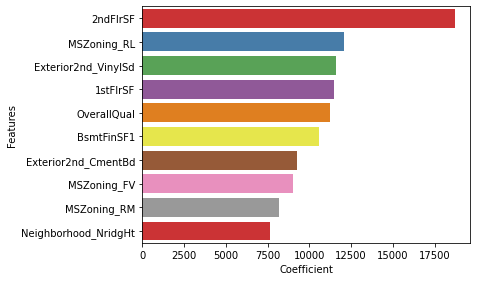

In [99]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

Conclusion :
The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 10
Lasso - 0.0004
The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.013743
Lasso - 0.013556
The Mean Squared Error of Lasso is slightly lower than that of Ridge

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.